In [ ]:
!pip install shapely

In [1]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from shapely.ops import cascaded_union

In [3]:
p0 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1]])

In [4]:
p1 = Polygon([[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]])

In [5]:
p2 = Polygon([[1, 1], [2, 1], [2, 2], [1, 2]])

In [6]:
p3 = Polygon([[1, 0], [2, 0], [2, 1], [1, 1]])

In [7]:
p4 = Polygon([[0.25, 0.25], [0.75, 0.25], [0.75, 0.75], [0.25, 0.75]])

In [8]:
p5 = Polygon([[0.75, 0.25], [1.25, 0.25], [1.25, 0.75], [0.75, 0.75]])

In [9]:
p6 = Polygon([[1.0, 0.25], [1.5, 0.25], [1.5, 0.75], [1.0, 0.75]])

In [10]:
p0, p1, p2, p3, p4, p5, p6

(<shapely.geometry.polygon.Polygon at 0x7f0d0ad73ad0>,
 <shapely.geometry.polygon.Polygon at 0x7f0d2c303b50>)

In [11]:
def plotpoly(bbuf):
    c=np.random.rand(3,)
    x,y=bbuf.exterior.coords.xy
    plt.plot(x,y,c=c)
    
def plotpolys(bbuf):
    plotmargin = 0.25
    for n in range(len(bbuf)):
        c=np.random.rand(3,)
        x,y=bbuf[n].exterior.coords.xy
        plt.plot(x,y,c=c)
    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - plotmargin,
          x1 + plotmargin,
          y0 - plotmargin,
          y1 + plotmargin))

In [12]:
def plotpolynum(bbuf,ax,c,nstr):
    xc,yc=bbuf.centroid.xy
    print(xc[0],yc[0])
    plt.text(xc[0],yc[0],nstr)

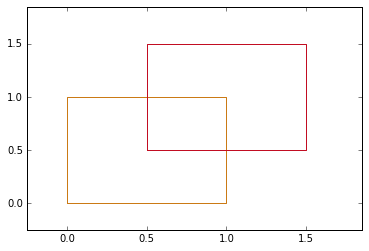

In [13]:
plotpolys([p0,p1])

In [14]:
p0.intersects(p1), p0.touches(p1), p0.crosses(p1)

(True, False, False)

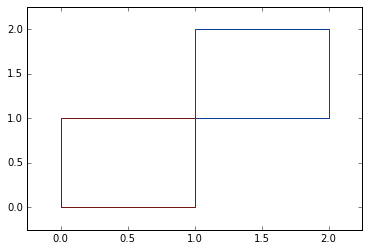

In [15]:
plotpolys([p0,p2])

In [16]:
p0.intersects(p2), p0.touches(p2), p0.crosses(p2)

(True, True, False)

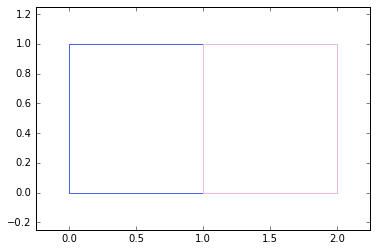

In [17]:
plotpolys([p0,p3])

In [18]:
p0.intersects(p3), p0.touches(p3), p0.crosses(p3)

(True, True, False)

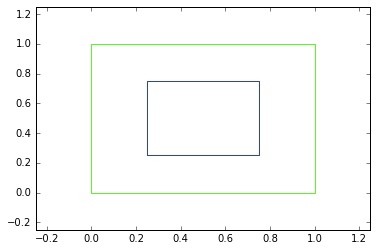

In [19]:
plotpolys([p0,p4])

In [20]:
p0.intersects(p4), p0.touches(p4), p0.crosses(p4)

(True, False, False)

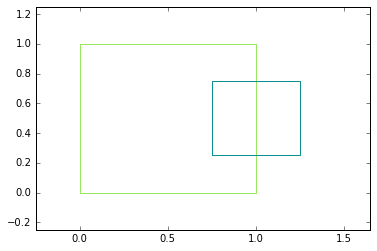

In [21]:
plotpolys([p0,p5])

In [22]:
p0.intersects(p5), p0.touches(p5), p0.crosses(p5)

(True, False, False)

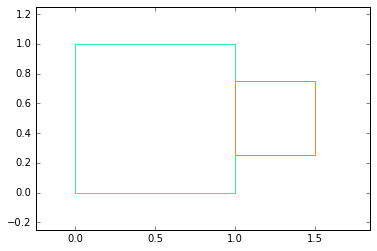

In [23]:
plotpolys([p0,p6])

In [24]:
p0.intersects(p6), p0.touches(p6), p0.crosses(p6)

(True, True, False)